<h1>Convolutional Neural Networks (CNN) to classify handwritten digits 0-9</h1>

In [0]:
#Import Modules

from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten
from keras.datasets import mnist
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

In [3]:
#Load the data and split into train and test set

#(images to train, labels to train), (images to test, labels to test)
(X_train,y_train),(X_test,y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [12]:
#Shape

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28, 1)
(60000,)
(10000, 28, 28, 1)
(10000,)


In [6]:
#First image at index=0 in the training data set
#0-255
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [7]:
#Image label
y_train[0]

5

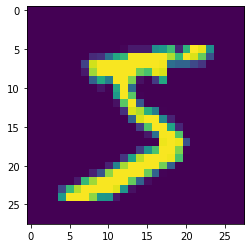

In [9]:
#Show the image
#first image at index 0
plt.imshow(X_train[0])
plt.show()

In [0]:
#Reshape the data to fit the model

#60000 rows, 28x28 pixels, depth of 1
X_train = X_train.reshape(60000,28,28,1)

#10000 rows, 28x28 pixels, depth of 1
X_test = X_test.reshape(10000,28,28,1)

In [13]:
#One hot encoding

y_train_one_hot = to_categorical(y_train)

y_test_one_hot = to_categorical(y_test)

#Index represents number (5)
print(y_train_one_hot[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


<h1>CNN model</h1>

In [0]:
#Build the CNN (4 layers)
model = Sequential()

#add model layers 3x3
model.add(Conv2D(64,kernel_size=3,activation='relu',input_shape=(28,28,1)))
model.add(Conv2D(32,kernel_size=3,activation='relu'))
model.add(Flatten())
#10 neurons
model.add(Dense(10, activation='softmax'))

In [0]:
#Compile the model
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [22]:
#Train the model
#epochs number of iterations
hist = model.fit(X_train,y_train_one_hot,validation_data=(X_test,y_test_one_hot),epochs=3)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 60000 samples, validate on 10000 samples
Epoch 1/3





60000/60000 [==============================] - 195s 3ms/step - loss: 14.5476 - acc: 0.0974 - val_loss: 14.5482 - val_acc: 0.0974
Epoch 2/3
60000/60000 [==============================] - 185s 3ms/step - loss: 14.5463 - acc: 0.0975 - val_loss: 14.5482 - val_acc: 0.0974
Epoch 3/3
60000/60000 [==============================] - 183s 3ms/step - loss: 14.5463 - acc: 0.0975 - val_loss: 14.5482 - val_acc: 0.0974


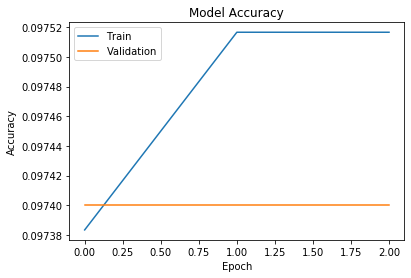

In [32]:
#Visualize the model's accuracy

plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train','Validation'],loc='best')
plt.show()

In [33]:
#Predictions for the first 4 images in the test set

#High probability of image being a 8
predictions = model.predict(X_test[:4])
print(predictions)

[[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]


In [34]:
#Predictions as number labels for first 4 images
print(np.argmax(predictions,axis=1))

#Actual results
print(y_test[:4])

[8 8 8 8]
[7 2 1 0]


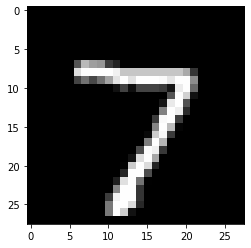

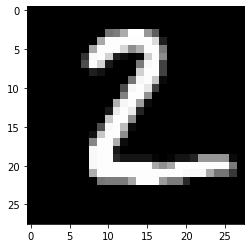

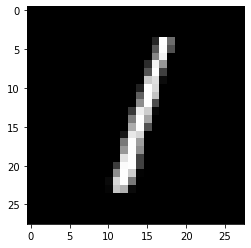

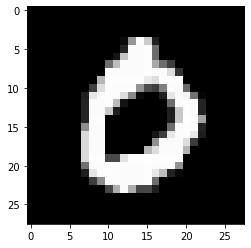

In [36]:
#First 4 images

for i in range(0,4):
  image = X_test[i]
  image = np.array(image,dtype=float)
  pixels = image.reshape((28,28))
  plt.imshow(pixels,cmap='gray')
  plt.show()